<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Чтение-файла-и-изучение-данных" data-toc-modified-id="Чтение-файла-и-изучение-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла и изучение данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Предобрабока-данных" data-toc-modified-id="Предобрабока-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобрабока данных</a></span><ul class="toc-item"><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Регулярные-выражения" data-toc-modified-id="Регулярные-выражения-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Регулярные выражения</a></span></li><li><span><a href="#Стоп-слова" data-toc-modified-id="Стоп-слова-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Стоп-слова</a></span></li><li><span><a href="#Очищенный-набор-данных-для-обучения-моделей" data-toc-modified-id="Очищенный-набор-данных-для-обучения-моделей-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Очищенный набор данных для обучения моделей</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорт библиотек

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk 
import re 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from sklearn.pipeline import Pipeline

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

### Чтение файла и изучение данных

Прочитаем файл и сохраним данные в переменной data:

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')
display(data.head(10))
display(data.tail(10))

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
5,5,"""\n\nCongratulations from me as well, use the ...",0
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,7,Your vandalism to the Matt Shirvington article...,0
8,8,Sorry if the word 'nonsense' was offensive to ...,0
9,9,alignment on this subject and which are contra...,0


,Unnamed: 0,text,toxic
159282,159441,"""\nNo he did not, read it again (I would have ...",0
159283,159442,"""\n Auto guides and the motoring press are not...",0
159284,159443,"""\nplease identify what part of BLP applies be...",0
159285,159444,Catalan independentism is the social movement ...,0
159286,159445,The numbers in parentheses are the additional ...,0
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0
159291,159450,"""\nAnd ... I really don't think you understand...",0


Посмотрим общую информацию о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Вывод:  
- датафрейм содержит 2 столбца и 159292 записи в каждом из них
- пропусков в данных нету
- для признака text необходимо провести предобработку - необходимо очистить комментарии от лишних слов, провести токенизацию (разбиение текста на токены, т.е., отдельные фразы, слова, символы) и лемматизацию текста (приведение слова к начальной форме или лемме)

### Анализ данных

Более подробно исследуем целевой признак toxic.

Посмотрим на соотношение нейтральных и токсичных комментариев:

In [4]:
display(data['toxic'].value_counts())
print(f"Процент объектов класса 1 к общему объёму датасета: {(sum(data['toxic']) / len(data) * 100):.2f}%")

0    143106
1     16186
Name: toxic, dtype: int64

Процент объектов класса 1 к общему объёму датасета: 10.16%


<AxesSubplot:xlabel='toxic', ylabel='count'>

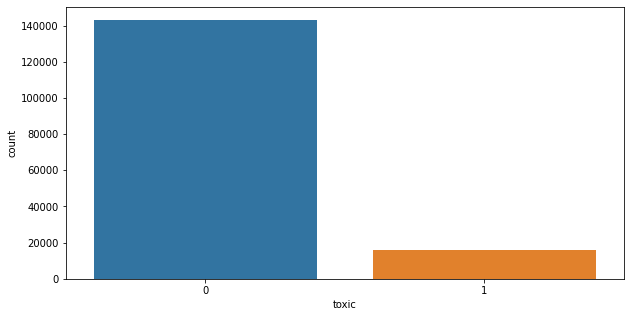

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x='toxic', data=data)

Видим, что почти 90% комментариев имеет нейтральную или позитивную тональность, а 10% - негативную. Т.е., каждый 10-й комментарий можно трактовать как токсичный.

### Предобрабока данных

Создадим копию датафрейма, чтобы не испортить исходный:

In [6]:
df = data.copy()
df.shape

(159292, 3)

#### Лемматизация

Функция pos_tag из библиотеки NLTK возвращает часть речи в специальном формате. Для ее преобразования к входному формату лемматизатора используется функция get_wordnet_pos.

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Проведём лемматизацию слов с помощью WordNetLemmatizer() из библиотеки nltk:

In [9]:
# pos tag text
pos_tags = pos_tag(df['text'])

# лемматизация текста
df['lemmas'] = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

df.head()

,Unnamed: 0,text,toxic,lemmas
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...
1,1,D'aww! He matches this background colour I'm s...,0,D'aww! He matches this background colour I'm s...
2,2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man, I'm really not trying to edit war. It..."
3,3,"""\nMore\nI can't make any real suggestions on ...",0,"""\nMore\nI can't make any real suggestions on ..."
4,4,"You, sir, are my hero. Any chance you remember...",0,"You, sir, are my hero. Any chance you remember..."


In [10]:
df.head()

,Unnamed: 0,text,toxic,lemmas
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...
1,1,D'aww! He matches this background colour I'm s...,0,D'aww! He matches this background colour I'm s...
2,2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man, I'm really not trying to edit war. It..."
3,3,"""\nMore\nI can't make any real suggestions on ...",0,"""\nMore\nI can't make any real suggestions on ..."
4,4,"You, sir, are my hero. Any chance you remember...",0,"You, sir, are my hero. Any chance you remember..."


#### Регулярные выражения

Уберем лишние символы и приведем текст в нижний регистр:

In [14]:
def remove_punctuation(text): 
    substitute = re.sub(r'[^a-zA-Z ]', ' ', text) 
    text = substitute.split() 
    # удаляем слова из одной буквы
    text = [t for t in text if len(t) > 1]
    return " ".join(text) 

In [15]:
df['punctuation_free'] = df['lemmas'].apply(lambda x: remove_punctuation(x.lower()))
df.head(10)

,Unnamed: 0,text,toxic,lemmas,punctuation_free
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...
1,1,D'aww! He matches this background colour I'm s...,0,D'aww! He matches this background colour I'm s...,aww he matches this background colour seemingl...
2,2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man, I'm really not trying to edit war. It...",hey man really not trying to edit war it just ...
3,3,"""\nMore\nI can't make any real suggestions on ...",0,"""\nMore\nI can't make any real suggestions on ...",more can make any real suggestions on improvem...
4,4,"You, sir, are my hero. Any chance you remember...",0,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...
5,5,"""\n\nCongratulations from me as well, use the ...",0,"""\n\nCongratulations from me as well, use the ...",congratulations from me as well use the tools ...
6,6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,cocksucker before you piss around on my work
7,7,Your vandalism to the Matt Shirvington article...,0,Your vandalism to the Matt Shirvington article...,your vandalism to the matt shirvington article...
8,8,Sorry if the word 'nonsense' was offensive to ...,0,Sorry if the word 'nonsense' was offensive to ...,sorry if the word nonsense was offensive to yo...
9,9,alignment on this subject and which are contra...,0,alignment on this subject and which are contra...,alignment on this subject and which are contra...


#### Стоп-слова

Удалим стоп-слова:

In [16]:
stop_words = set(nltk_stopwords.words('english'))  

def remove_stopwords(text):
    clean_text = [w for w in text.split() if not w in stop_words]  
    return clean_text

In [17]:
df['stopwords_free'] = df['punctuation_free'].apply(lambda x: remove_stopwords(x))
df.head()

,Unnamed: 0,text,toxic,lemmas,punctuation_free,stopwords_free
0,0,Explanation\nWhy the edits made under my usern...,0,Explanation\nWhy the edits made under my usern...,explanation why the edits made under my userna...,"[explanation, edits, made, username, hardcore,..."
1,1,D'aww! He matches this background colour I'm s...,0,D'aww! He matches this background colour I'm s...,aww he matches this background colour seemingl...,"[aww, matches, background, colour, seemingly, ..."
2,2,"Hey man, I'm really not trying to edit war. It...",0,"Hey man, I'm really not trying to edit war. It...",hey man really not trying to edit war it just ...,"[hey, man, really, trying, edit, war, guy, con..."
3,3,"""\nMore\nI can't make any real suggestions on ...",0,"""\nMore\nI can't make any real suggestions on ...",more can make any real suggestions on improvem...,"[make, real, suggestions, improvement, wondere..."
4,4,"You, sir, are my hero. Any chance you remember...",0,"You, sir, are my hero. Any chance you remember...",you sir are my hero any chance you remember wh...,"[sir, hero, chance, remember, page]"


Оставим только обработанную колонку и колонку 'toxic':

In [18]:
df = df[['stopwords_free', 'toxic']]
df.head()

,stopwords_free,toxic
0,"[explanation, edits, made, username, hardcore,...",0
1,"[aww, matches, background, colour, seemingly, ...",0
2,"[hey, man, really, trying, edit, war, guy, con...",0
3,"[make, real, suggestions, improvement, wondere...",0
4,"[sir, hero, chance, remember, page]",0


#### Очищенный набор данных для обучения моделей

Подготовим очищенный набор данных для обучения моделей:

- выделим целевой признак toxic и признаки

In [19]:
target = df['toxic']
features = df.drop('toxic', axis = 1)

print('Целевой признак:', target.shape)
print('Признаки:', features.shape)

Целевой признак: (159292,)
Признаки: (159292, 1)


- разделим датафрейм на обучающую и тестовую выборки в соотношении 80:20

In [20]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            train_size=0.80, 
                                                                            test_size=0.20, 
                                                                            random_state=123)

In [21]:
print('Размер обучающей выборки', features_train.shape )
print('Размер тестовой выборки', features_test.shape)

Размер обучающей выборки (127433, 1)
Размер тестовой выборки (31859, 1)


- созадим корпус текстов

In [22]:
corpus_train = features_train['stopwords_free']
corpus_train = [str (item) for item in corpus_train]
corpus_test = features_test['stopwords_free']
corpus_test = [str (item) for item in corpus_test]
corpus_test[:3]

["['racist', 'well', 'schwarzenegger', 'never', 'made', 'good', 'movie']",
 "['let', 'clear', 'mr', 'nice', 'guy', 'fellow', 'ideological', 'partisan', 'often', 'coordinate', 'edits', 'reverts', 'reverted', 'restored', 'reverted', 'far', 'backing', 'ideological', 'comrade', 'talk', 'page', 'stand', 'ready', 'support', 'masters', 'gaming', 'whole', 'website', 'play', 'propaganda', 'game', 'good', 'faith', 'grown', 'man', 'observed', 'behavior', 'long', 'enough', 'assumptions', 'good', 'faith', 'get', 'replaced', 'reasoned', 'informed', 'opinion']",
 "['ok', 'one', 'edited', 'talk', 'page', 'years', 'going', 'change']"]

- вычислим TF-IDF для корпуса текстов

In [23]:
# создание признака tf-idfs (оценка важности слова в тексте)
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

In [24]:
tf_idf = count_tf_idf.fit(corpus_train)
train_X = tf_idf.transform(corpus_train)
test_X = tf_idf.transform(corpus_test)

Данные подготовили, переходим к обучению

## Обучение

Обучим следующие модели:  
- LogisticRegression
- RandomForestClassifier
- DecisionTreeClassifier

In [25]:
train_models = []

### LogisticRegression

In [29]:
%%time
# зададим алгоритм для модели 
lr = LogisticRegression(random_state=123, class_weight='balanced', solver='liblinear') 

# определим словарь с набором параметров
lr_parametrs = {'C': [0.1, 1, 10]}

# применим GridSearchCV с кросс-валидацией
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_parametrs, scoring='f1', cv=5)
lr_grid.fit(train_X, target_train)

print('Лучшие параметры: '+str(lr_grid.best_params_))
print('Accuracy logisticRegression: '+str(lr_grid.best_score_))

Лучшие параметры: {'C': 10}
Accuracy logisticRegression: 0.7661793275828204
CPU times: user 1min 56s, sys: 1min 55s, total: 3min 52s
Wall time: 3min 52s


In [30]:
train_models.append([lr_grid, lr_grid.best_score_])

### RandomForestClassifier

In [31]:
%%time
# зададим алгоритм для модели, укажем параметр class_weight = 'balanced'
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

# определим словарь с набором параметров
rf_parametrs = {'n_estimators': range(20, 40, 5),
                'max_depth': range(4, 8, 2),
                'min_samples_leaf': range(3,5),
                'min_samples_split': range(2,6,2)}

# применяем GridSearchCV с кросс-валидацией
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_parametrs, scoring='f1', cv=5)
rf_grid.fit(train_X, target_train)

print('Лучшие параметры: '+str(rf_grid.best_params_))
print('Accuracy RandomForestClassifier: '+str(rf_grid.best_score_))

Лучшие параметры: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}
Accuracy RandomForestClassifier: 0.33021653413196606
CPU times: user 7min 24s, sys: 3.7 s, total: 7min 27s
Wall time: 7min 29s


In [32]:
train_models.append([rf_grid, rf_grid.best_score_])

### DecisionTreeClassifier

In [33]:
%%time
# зададим алгоритм для модели, укажем параметр class_weight = 'balanced'
dt = DecisionTreeClassifier(random_state=12345)

# определим словарь с набором параметров
dt_parameters = {'max_depth':range(1,11,2)}

# применяем GridSearchCV с кросс-валидацией
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_parameters, scoring = 'f1', cv=5)
dt_grid.fit(train_X, target_train)

print('Лучшие параметры: '+str(dt_grid.best_params_))
print('Accuracy RandomForestClassifier: '+str(dt_grid.best_score_))

Лучшие параметры: {'max_depth': 9}
Accuracy RandomForestClassifier: 0.5738145994694066
CPU times: user 4min 21s, sys: 774 ms, total: 4min 21s
Wall time: 4min 23s


In [34]:
train_models.append([dt_grid, dt_grid.best_score_])

### Результат

In [35]:
result = pd.DataFrame(train_models, columns=['model', 'f1_train'])
pd.options.display.max_colwidth = 0
display(result.sort_values(by='f1_train'))

,model,f1_train
1,"GridSearchCV(cv=5,\n estimator=RandomForestClassifier(class_weight='balanced',\n n_jobs=-1),\n param_grid={'max_depth': range(4, 8, 2),\n 'min_samples_leaf': range(3, 5),\n 'min_samples_split': range(2, 6, 2),\n 'n_estimators': range(20, 40, 5)},\n scoring='f1')",0.330217
2,"GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),\n param_grid={'max_depth': range(1, 11, 2)}, scoring='f1')",0.573815
0,"GridSearchCV(cv=5,\n estimator=LogisticRegression(class_weight='balanced',\n random_state=123,\n solver='liblinear'),\n param_grid={'C': [0.1, 1, 10]}, scoring='f1')",0.766179


Значение метрики f1 выше 0.75 (условие задачи) только у LogisticRegression. Только ее протестируем еа тестовых данных.

## Тестирование

In [36]:
predictions = lr_grid.predict(test_X)
f1 = round(f1_score(target_test, predictions), 3)
f1

0.771

**Проверим модели на адекватность**

In [37]:
pred_previous = target_test.shift()
pred_previous.iloc[0] = target_train.iloc[-1]

f1 = round(f1_score(target_test, pred_previous), 3)
f1

0.104

Зачение f1 у LogisticRegression выше чем 0.104 (тк 0.104 - это ориентир). Проверка на адекватность пройдена у одной модели

## Выводы

Во время проекта:  
1. изучили и подготовили данные:  
- посмотрели общую информацию о данных  
- убедились, что пропуски отсутствуют  
- провели предобработку текста (удалили лишние символы, убрали стоп-слова)  
2. обучили следующие модели: LogisticRegression, RandomForestClassifier и DecisionTreeClassifier. Только модель LogisticRegression справилась с поставленной задачей - достичь метрику качества F1 не меньше 0.75.

**Результат:** как наилучшую модель для классификации комментариев можно рекомендовать модель LogisticRegression с гиперпараметром class_weight = 'balanced', solver='liblinear' и 'C' = 10, которая дает результат F1 = 0.771.